In [126]:
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
from datetime import datetime, timedelta
sns.set()

# Downloading data and parse it into `Pandas DataFrame`
Credit: [https://www.ontario.ca/page/motor-fuel-prices](https://www.ontario.ca/page/motor-fuel-prices)

2021-08-30 10:15:31.431561


In [143]:
df = pd.read_csv(r'https://ontario.ca/v1/files/fuel-prices/fueltypesall.csv')

# parsing date time
df['Date'] = pd.to_datetime(df.Date)

# There are duplicates in data, so take only the first row up until the most recent monday

# getting the most recent Monday
# credit: https://stackoverflow.com/questions/59981999/find-monday-of-current-week-in-python
now = datetime.now()
monday = now - timedelta(days = now.weekday())
# print(monday)
monday_idx = min((df[df.Date == str(monday.date())]).index)
df = df.iloc[:monday_idx+1] 

In [144]:
df.sample(5)

,Date,Ottawa,Toronto West/Ouest,Toronto East/Est,Windsor,London,Peterborough,St. Catharine's,Sudbury,Sault Saint Marie,Thunder Bay,North Bay,Timmins,Kenora,Parry Sound,Ontario Average/Moyenne provinciale,Southern Average/Moyenne du sud de l'Ontario,Northern Average/Moyenne du nord de l'Ontario,Fuel Type,Type de carburant
1549,2019-09-09,115.3,116.1,115.9,115.8,117.4,0.0,0.0,117.0,117.6,132.0,117.4,121.9,0.0,0.0,116.7,116.0,122.1,Regular Unleaded Gasoline,Essence sans plomb
590,2001-04-23,75.4,75.3,75.2,76.5,77.2,0.0,0.0,79.7,81.4,80.9,78.1,77.8,0.0,0.0,76.0,75.5,80.0,Regular Unleaded Gasoline,Essence sans plomb
882,2006-11-27,87.9,85.7,87.6,76.5,87.1,0.0,0.0,86.8,94.9,96.4,87.9,95.9,0.0,0.0,87.0,86.4,92.5,Regular Unleaded Gasoline,Essence sans plomb
1504,2018-10-29,112.8,118.7,117.4,111.9,118.5,0.0,0.0,125.7,122.3,141.2,118.4,127.8,0.0,0.0,118.1,116.7,129.1,Regular Unleaded Gasoline,Essence sans plomb
687,2003-03-03,76.5,77.1,75.3,77.6,77.8,0.0,0.0,82.5,83.7,86.1,81.1,83.5,0.0,0.0,77.2,76.5,83.7,Regular Unleaded Gasoline,Essence sans plomb


<AxesSubplot:xlabel='Date', ylabel='Toronto West/Ouest'>

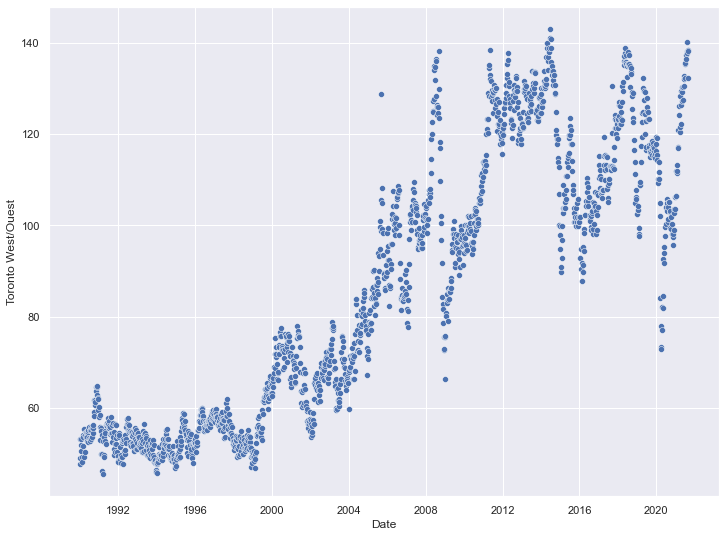

In [145]:
# take a look at the entire data long with window average
fig, ax = plt.subplots(figsize=(12,9))
sns.scatterplot(x=df['Date'], y=df['Toronto West/Ouest'], ax=ax)
# df.rolling(10).mean()['Toronto West/Ouest'].plot(ax=ax)